<a href="https://colab.research.google.com/github/MohamedSalihDev/Tesla-TSLA-Stock-Price-prediction-using-Facebook-Prophet/blob/main/forecasting_automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis

#fbprophet = Forecasting
import fbprophet
#plotly= data visualization


In [ ]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [ ]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default = 'colab'

## Importing the Dataset & Exploring it

In [ ]:
df = pd.read_csv("AMZN.csv")

In [ ]:
#read_csv function from pandas

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-08,3358.500000,3365.000000,3304.000000,3322.939941,3322.939941,3257400
1,2021-02-09,3312.489990,3338.000000,3297.840088,3305.000000,3305.000000,2203500
2,2021-02-10,3314.000000,3317.949951,3254.000000,3286.580078,3286.580078,3151600
3,2021-02-11,3292.000000,3292.000000,3248.060059,3262.129883,3262.129883,2301400
4,2021-02-12,3250.000000,3280.250000,3233.310059,3277.709961,3277.709961,2335300
...,...,...,...,...,...,...,...
248,2022-02-01,3000.000000,3034.159912,2952.550049,3023.870117,3023.870117,2961000
249,2022-02-02,3101.010010,3101.500000,2977.270020,3012.250000,3012.250000,4366500
250,2022-02-03,2834.750000,2884.949951,2766.659912,2776.909912,2776.909912,11276600
251,2022-02-04,3112.129883,3224.000000,3012.159912,3152.790039,3152.790039,12640500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,3332.747040,3366.451282,3295.726049,3329.849290,3329.849290,3.435140e+06
std,180.738141,180.174702,184.749940,182.967560,182.967560,1.411987e+06
min,2780.000000,2872.000000,2707.040039,2776.909912,2776.909912,1.680300e+06
25%,3223.750000,3257.949951,3208.000000,3229.719971,3229.719971,2.561200e+06
50%,3345.010010,3369.189941,3304.000000,3335.550049,3335.550049,3.139100e+06
75%,3452.000000,3483.320068,3413.510010,3448.139893,3448.139893,3.875800e+06
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,1.264050e+07


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
px.area(df, x="Date", y="Close")

In [ ]:
px.line(df, x="Date", y="Close")

In [ ]:
px.area(df, x="Date", y="Volume")

In [ ]:
px.bar(df,y="Volume")

In [ ]:
px.box(df, y="Close")

# Understanding Facebook Prophet

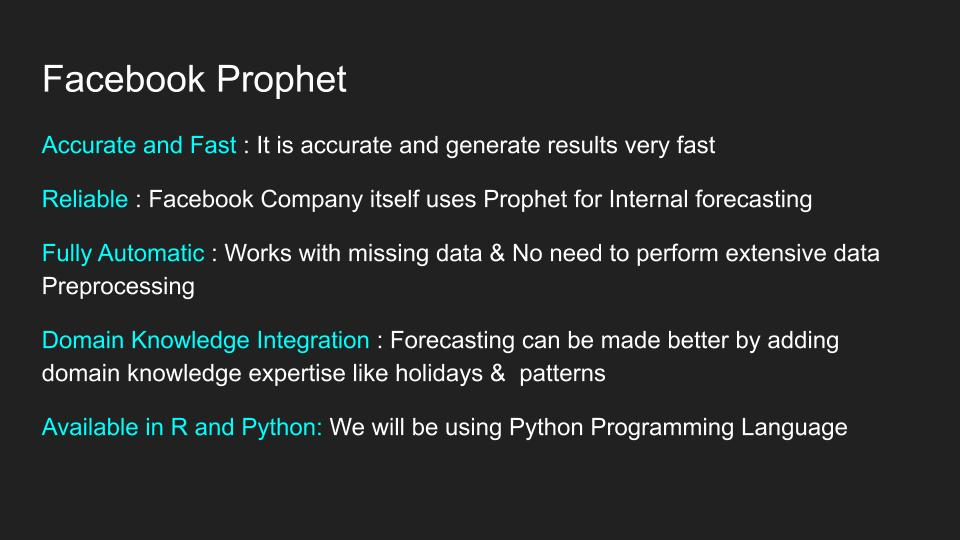

## Data Preperation

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-08,3358.500000,3365.000000,3304.000000,3322.939941,3322.939941,3257400
1,2021-02-09,3312.489990,3338.000000,3297.840088,3305.000000,3305.000000,2203500
2,2021-02-10,3314.000000,3317.949951,3254.000000,3286.580078,3286.580078,3151600
3,2021-02-11,3292.000000,3292.000000,3248.060059,3262.129883,3262.129883,2301400
4,2021-02-12,3250.000000,3280.250000,3233.310059,3277.709961,3277.709961,2335300
...,...,...,...,...,...,...,...
248,2022-02-01,3000.000000,3034.159912,2952.550049,3023.870117,3023.870117,2961000
249,2022-02-02,3101.010010,3101.500000,2977.270020,3012.250000,3012.250000,4366500
250,2022-02-03,2834.750000,2884.949951,2766.659912,2776.909912,2776.909912,11276600
251,2022-02-04,3112.129883,3224.000000,3012.159912,3152.790039,3152.790039,12640500


In [ ]:
columns = ['Date', "Close"]
ndf = pd.DataFrame(df, columns=columns)

In [ ]:
prophet_df= ndf.rename(columns={'Date':'ds', 'Close':'y'})

In [ ]:
prophet_df

,ds,y
0,2021-02-08,3322.939941
1,2021-02-09,3305.000000
2,2021-02-10,3286.580078
3,2021-02-11,3262.129883
4,2021-02-12,3277.709961
...,...,...
248,2022-02-01,3023.870117
249,2022-02-02,3012.250000
250,2022-02-03,2776.909912
251,2022-02-04,3152.790039


## Creating Facebook Prophet Model

In [ ]:
m=Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [ ]:
future = m.make_future_dataframe(periods = 30)
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-02-08,3149.146481,2959.225338,3267.763471,3149.146481,3149.146481,-35.130415,-35.130415,-35.130415,-35.130415,-35.130415,-35.130415,0.0,0.0,0.0,3114.016067
1,2021-02-09,3150.779599,2970.795470,3276.568218,3150.779599,3150.779599,-26.883272,-26.883272,-26.883272,-26.883272,-26.883272,-26.883272,0.0,0.0,0.0,3123.896327
2,2021-02-10,3152.412717,2968.859807,3289.726948,3152.412717,3152.412717,-29.273919,-29.273919,-29.273919,-29.273919,-29.273919,-29.273919,0.0,0.0,0.0,3123.138797
3,2021-02-11,3154.045834,2969.946388,3275.368817,3154.045834,3154.045834,-35.561589,-35.561589,-35.561589,-35.561589,-35.561589,-35.561589,0.0,0.0,0.0,3118.484245
4,2021-02-12,3155.678952,2963.730875,3280.891862,3155.678952,3155.678952,-35.770019,-35.770019,-35.770019,-35.770019,-35.770019,-35.770019,0.0,0.0,0.0,3119.908933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,2022-03-05,2864.181328,2785.577192,3092.378280,2843.607201,2886.316789,81.309608,81.309608,81.309608,81.309608,81.309608,81.309608,0.0,0.0,0.0,2945.490936
279,2022-03-06,2857.534839,2784.909119,3086.821997,2836.116808,2881.111694,81.309607,81.309607,81.309607,81.309607,81.309607,81.309607,0.0,0.0,0.0,2938.844446
280,2022-03-07,2850.888350,2665.466821,2966.002162,2828.356535,2875.889947,-35.130415,-35.130415,-35.130415,-35.130415,-35.130415,-35.130415,0.0,0.0,0.0,2815.757936
281,2022-03-08,2844.241861,2660.590527,2975.882377,2820.015237,2871.189787,-26.883272,-26.883272,-26.883272,-26.883272,-26.883272,-26.883272,0.0,0.0,0.0,2817.358589


In [ ]:
px.line(forecast, x='ds', y='yhat')

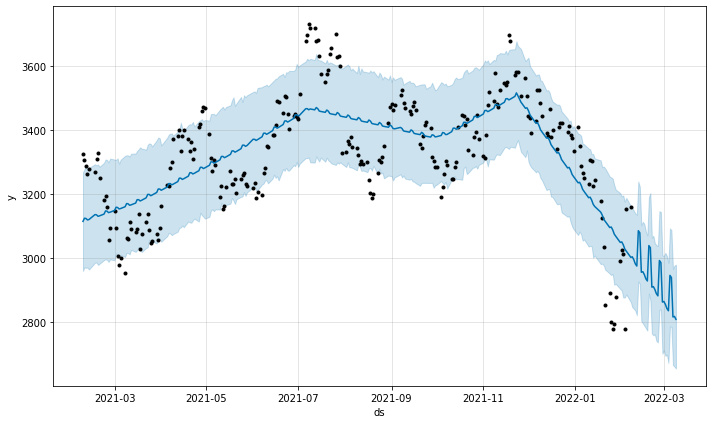

In [ ]:
figure = m.plot(forecast, xlabel = 'ds', ylabel = 'y')

##Downloading the Forecast data

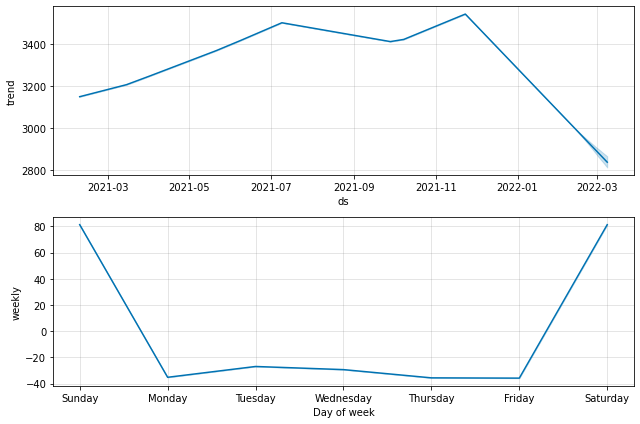

In [ ]:
figure2 = m.plot_components(forecast)

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>